In [320]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import requests
from termcolor import colored
import json
import numpy as np

In [371]:
imdb_csv = pd.read_csv("Resources/marvel_df.csv")
imdb_csv = imdb_csv.drop(21)
imdb_csv["Year Released"] = imdb_csv["Year Released"].astype("int64")
imdb_csv["Year Released"] = imdb_csv["Year Released"].astype("str")
imdb_csv["Profits (Domestic)"] = imdb_csv["BoxOffice (domestic)"] - imdb_csv["Film Budget"]

imdb_csv

,Film,Main Character,Film Budget,BoxOffice (domestic),IMDB Rating (out of 10),Year Released,Profits (Domestic)
0,Iron Man,Iron Man,140000000.0,318298180.0,7.9,2008,178298180.0
1,The Incredible Hulk,The Hulk,150000000.0,134518390.0,6.8,2008,-15481610.0
2,Iron Man 2,Iron Man,200000000.0,312057433.0,7.0,2010,112057433.0
3,Thor,Thor,150000000.0,181015141.0,7.0,2011,31015141.0
4,Captain America: The First Avenger,Captain America,140000000.0,176636816.0,6.9,2011,36636816.0
5,The Avengers,Captain America,220000000.0,623279547.0,8.1,2012,403279547.0
6,Iron Man 3,Iron Man,200000000.0,408992272.0,7.2,2013,208992272.0
7,Thor: The Dark World,Thor,170000000.0,206360018.0,7.0,2013,36360018.0
8,Captain America: The Winter Soldier,Captain America,170000000.0,228636083.0,7.8,2014,58636083.0
9,Guardians of the Galaxy,Starlord,170000000.0,270592504.0,8.1,2014,100592504.0


In [415]:
avenger_sales_df = imdb_csv[imdb_csv.Film.str.contains("Avengers") == True]
avenger_sales_df[["Film", "BoxOffice (domestic)"]]

,Film,BoxOffice (domestic)
5,The Avengers,623279547.0
10,Avengers: Age of Ultron,429113729.0
18,Avengers: Infinity War,664987816.0


In [381]:
imdb_csv_df = imdb_csv.loc[:,['Film', 'Profits (Domestic)']]
imdb_csv_df = imdb_csv_df.sort_values(['Profits (Domestic)'],ascending=False).head()
imdb_csv_df = imdb_csv_df.reset_index()
imdb_csv_df = imdb_csv_df.drop('index', axis=1)
imdb_csv_df.index = np.arange(1, 6)
imdb_csv_df

,Film,Profits (Domestic)
1,The Avengers,403279547.0
2,Avengers: Infinity War,343987816.0
3,Black Panther,301105037.0
4,Iron Man 3,208992272.0
5,Guardians of the Galaxy Vol. 2,189804217.0


pandas.core.series.Series

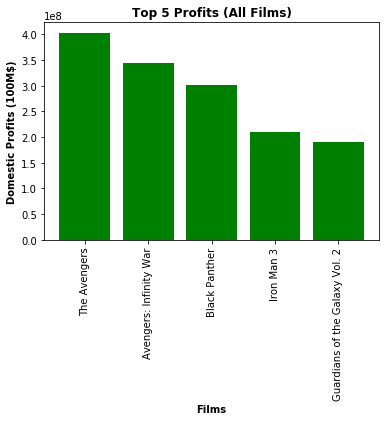

In [400]:
film = list(imdb_csv_df["Film"])
x_axis = np.arange(len(film))
profits = list(imdb_csv_df["Profits (Domestic)"])

imdb_csv_plot = plt.bar(x_axis, profits, tick_label=film, color="green")
plt.xticks(rotation=90)
plt.ylabel("Domestic Profits (100M$)", fontweight="bold")
plt.xlabel("Films", fontweight="bold")
plt.title("Top 5 Profits (All Films)", fontweight="bold")
plt.show()


In [392]:
film

['The Avengers',
 'Avengers: Infinity War',
 'Black Panther',
 'Iron Man 3',
 'Guardians of the Galaxy Vol. 2']

In [369]:
Davids_marvel_df = pd.read_csv("Resources/Marvel Characters Ratings and Actors Salaries.csv")
Davids_marvel_df.head()

,Movie,Actor Name,Salary,Fan Rating,Cinematic Fan Rating
0,Ant-Man,Paul Rudd,"1,500,000",38,16
1,Black Panther,Chadwidk Boseman,"2,000,000",34,11
2,Captain America,Chris Evans,"1,000,000",3,6
3,Captain Marvel,Brie Larson,"5,000,000",48,78
4,Doctor Strange,Benedict Cumberbatch,"5,513,655",8,3


In [309]:
fan_rating_total = Davids_marvel_df["Fan Rating"].sum()
Davids_marvel_df["Fan Rating Percentage"] = round(Davids_marvel_df["Fan Rating"] / fan_rating_total * 100, 2)
Davids_marvel_df["Fan Rating Percentage"]

0    23.03
1    20.61
2     1.82
3    29.09
4     4.85
5    12.73
6     2.42
7     0.61
8     3.64
9     1.21
Name: Fan Rating Percentage, dtype: float64

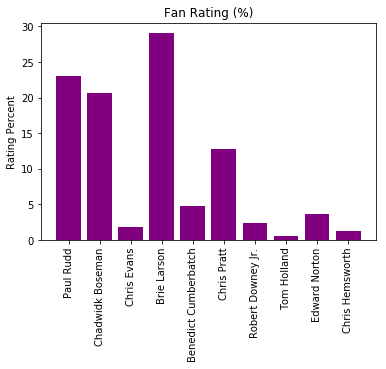

In [318]:
fan_rating_percent_pie = plt.bar(x=Davids_marvel_df["Actor Name"], height=Davids_marvel_df["Fan Rating Percentage"],
                                 tick_label=Davids_marvel_df["Actor Name"], color="purple")
plt.xticks(rotation=90)
plt.title("Fan Rating (%)")
plt.ylabel("Rating Percent")

plt.show()

In [341]:
imdb_stndAlone_df = imdb_csv.drop([5, 10, 18])
imdb_stndAlone_df = imdb_stndAlone_df.reset_index()
imdb_stndAlone_df = imdb_stndAlone_df.drop("index", axis=1)
imdb_stndAlone_df = imdb_stndAlone_df.rename(columns={"IMDB Rating (out of 10)": "OMDB Rating (out of 10)"})
imdb_stndAlone_df["Film"] = imdb_stndAlone_df["Film"].str.replace("\W", " ")
imdb_stndAlone_df

,Film,Main Character,Film Budget,BoxOffice (domestic),OMDB Rating (out of 10),Year Released,Profits (Domestic)
0,Iron Man,Iron Man,140000000.0,318298180.0,7.9,2008,178298180.0
1,The Incredible Hulk,The Hulk,150000000.0,134518390.0,6.8,2008,-15481610.0
2,Iron Man 2,Iron Man,200000000.0,312057433.0,7.0,2010,112057433.0
3,Thor,Thor,150000000.0,181015141.0,7.0,2011,31015141.0
4,Captain America The First Avenger,Captain America,140000000.0,176636816.0,6.9,2011,36636816.0
5,Iron Man 3,Iron Man,200000000.0,408992272.0,7.2,2013,208992272.0
6,Thor The Dark World,Thor,170000000.0,206360018.0,7.0,2013,36360018.0
7,Captain America The Winter Soldier,Captain America,170000000.0,228636083.0,7.8,2014,58636083.0
8,Guardians of the Galaxy,Starlord,170000000.0,270592504.0,8.1,2014,100592504.0
9,Ant Man,Ant-Man,130000000.0,138002223.0,7.3,2015,8002223.0


In [342]:
top_5_boxoffice_dom = imdb_stndAlone_df[["Film", "BoxOffice (domestic)"]]
top_5_boxoffice_dom = top_5_boxoffice_dom.sort_values(by="BoxOffice (domestic)", ascending=False).head()
top_5_boxoffice_dom = top_5_boxoffice_dom.reset_index()
top_5_boxoffice_dom.index = np.arange(1, 6)
top_5_boxoffice_dom = top_5_boxoffice_dom.drop("index", axis=1)
top_5_boxoffice_dom

,Film,BoxOffice (domestic)
1,Black Panther,501105037.0
2,Iron Man 3,408992272.0
3,Captain America Civil War,408080554.0
4,Guardians of the Galaxy Vol 2,389804217.0
5,Spider Man Homecoming,334166825.0


In [343]:
top_5_film_budget = imdb_stndAlone_df[["Film", "Film Budget"]]
top_5_film_budget = top_5_film_budget.sort_values(by="Film Budget", ascending=False).head()
top_5_film_budget = top_5_film_budget.reset_index()
top_5_film_budget.index = np.arange(1, 6)
top_5_film_budget = top_5_film_budget.drop("index", axis=1)
top_5_film_budget

,Film,Film Budget
1,Captain America Civil War,250000000.0
2,Black Panther,200000000.0
3,Iron Man 2,200000000.0
4,Iron Man 3,200000000.0
5,Guardians of the Galaxy Vol 2,200000000.0


In [344]:
top_5_profits_dom = imdb_stndAlone_df[["Film", "Profits (Domestic)"]]
top_5_profits_dom = top_5_profits_dom.sort_values(by="Profits (Domestic)", ascending=False).head()
top_5_profits_dom = top_5_profits_dom.reset_index()
top_5_profits_dom.index = np.arange(1, 6)
top_5_profits_dom = top_5_profits_dom.drop("index", axis=1)
top_5_profits_dom

,Film,Profits (Domestic)
1,Black Panther,301105037.0
2,Iron Man 3,208992272.0
3,Guardians of the Galaxy Vol 2,189804217.0
4,Captain Marvel,181305815.0
5,Iron Man,178298180.0


In [345]:
top_5_imdb_rating = imdb_stndAlone_df[["Film", "OMDB Rating (out of 10)"]]
top_5_imdb_rating = top_5_imdb_rating.sort_values(by="OMDB Rating (out of 10)", ascending=False).head()
top_5_imdb_rating = top_5_imdb_rating.reset_index()
top_5_imdb_rating.index = np.arange(1, 6)
top_5_imdb_rating = top_5_imdb_rating.drop("index", axis=1)
top_5_imdb_rating

,Film,OMDB Rating (out of 10)
1,Guardians of the Galaxy,8.1
2,Iron Man,7.9
3,Thor Ragnarok,7.9
4,Captain America Civil War,7.8
5,Captain America The Winter Soldier,7.8


In [329]:
Narys_marvel_df = pd.read_csv("Resources/TMDb_Data.csv")
Narys_marvel_df = Narys_marvel_df.drop([5, 10, 18])
Narys_marvel_df = Narys_marvel_df.reset_index()
Narys_marvel_df["Profits (Global)"] = Narys_marvel_df["Box Office Sales (Global)"] - Narys_marvel_df["Budget"]
Narys_marvel_df = Narys_marvel_df.drop("index", axis=1)
Narys_marvel_df = Narys_marvel_df.rename(columns={"Films": "Film"})
Narys_marvel_df

,Film,Film ID,Budget,Box Office Sales (Global),Rating,Profits (Global)
0,Iron Man,1726,140000000,585174222,7.5,445174222
1,The Incredible Hulk,1724,150000000,163712074,6.2,13712074
2,Iron Man 2,10138,200000000,623933331,6.8,423933331
3,Thor,10195,150000000,449326618,6.7,299326618
4,Captain America The First Avenger,1771,140000000,370569774,6.8,230569774
5,Iron Man 3,68721,200000000,1215439994,6.9,1015439994
6,Thor The Dark World,76338,170000000,644571402,6.7,474571402
7,Captain America The Winter Soldier,100402,170000000,714766572,7.7,544766572
8,Guardians of the Galaxy,118340,170000000,773328629,7.9,603328629
9,Ant Man,102899,130000000,519311965,7.1,389311965


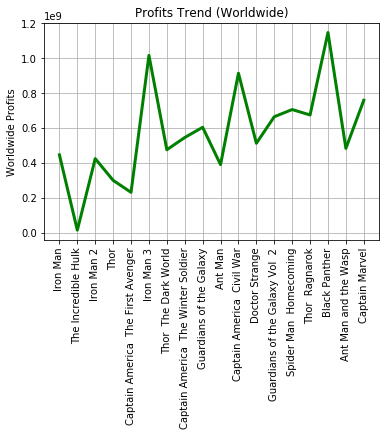

In [324]:
x_axis = Narys_marvel_df["Films"]
sales_plot_global = plt.plot(x_axis, Narys_marvel_df["Profits (Global)"], linewidth=3, color="green")
plt.xticks(rotation=90)
plt.grid()
plt.title("Profits Trend (Worldwide)")
plt.ylabel("Worldwide Profits")

plt.show()

In [ ]:
x_axis = imdb_stndAlone_df["Films"]
sales_plot_global = plt.plot(x_axis, imdb_stndAlone_df["Profits (Global)"], linewidth=3, color="green")
plt.xticks(rotation=90)
plt.grid()
plt.title("Profits Trend (Worldwide)")
plt.ylabel("Worldwide Profits")

plt.show()

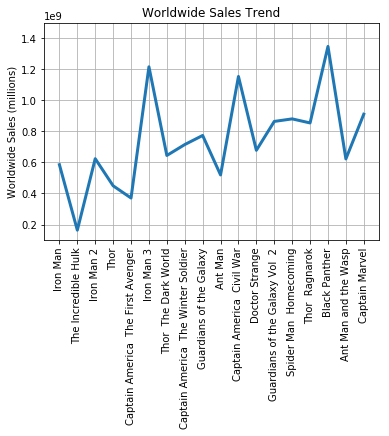

In [325]:
x_axis = Narys_marvel_df["Films"]
sales_plot_global = plt.plot(x_axis, Narys_marvel_df["Box Office Sales (Global)"], linewidth=3,)
plt.xticks(rotation=90)
plt.grid()
plt.ylim(100000000, 1500000000)
plt.title("Worldwide Sales Trend")
plt.ylabel("Worldwide Sales (millions)")

plt.show()

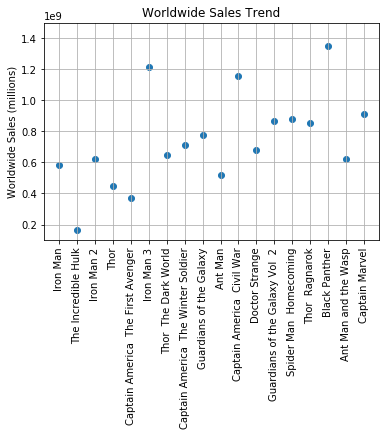

In [326]:
x_axis = Narys_marvel_df["Films"]
sales_plot_global = plt.scatter(x_axis, Narys_marvel_df["Box Office Sales (Global)"])
stats.linregress
plt.xticks(rotation=90)
plt.grid()
plt.ylim(100000000, 1500000000)
plt.title("Worldwide Sales Trend")
plt.ylabel("Worldwide Sales (millions)")

plt.show()

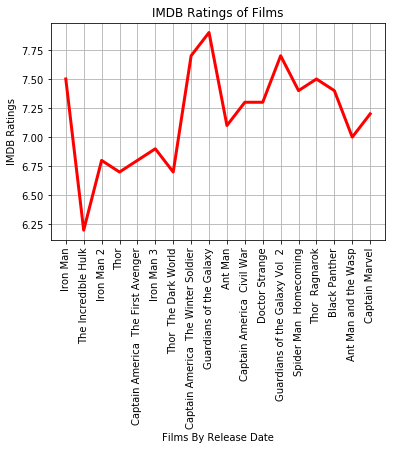

In [358]:
x_axis = new_marvel_df["Film"]
ratings_plot_global = plt.plot(x_axis, Narys_marvel_df["Rating"], linewidth=3, color="red")
plt.xlabel('Films By Release Date')
plt.ylabel("IMDB Ratings")
plt.title("IMDB Ratings of Films")
plt.xticks(rotation=90)
plt.grid()

plt.show()

In [370]:
new_marvel_df = pd.merge(imdb_stndAlone_df, Narys_marvel_df, on="Film", how="left")
new_marvel_df["Total Average Rating"] = round((new_marvel_df["OMDB Rating (out of 10)"] + new_marvel_df["Rating"]) / 2, 1)
new_marvel_df = new_marvel_df.drop(["OMDB Rating (out of 10)", "Rating", "Film Budget", "Film ID"], axis=1)
new_marvel_df = new_marvel_df.drop(17)
new_marvel_df.to_csv("merged_df.csv")

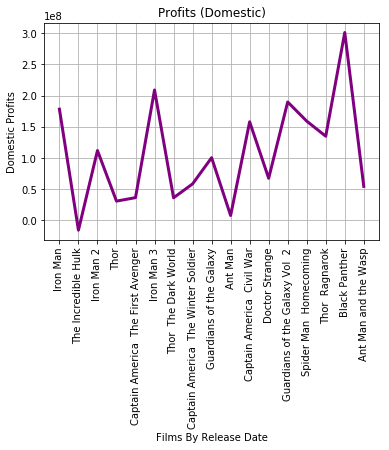

In [367]:
x_axis = new_marvel_df["Film"]
ratings_plot_global = plt.plot(x_axis, new_marvel_df["Profits (Domestic)"], linewidth=3, color="purple")
plt.xlabel('Films By Release Date')
plt.ylabel("Domestic Profits")
plt.title("Profits (Domestic)")
plt.xticks(rotation=90)
plt.grid()

plt.show()

In [363]:
910298835 + 336810568.95

1247109403.95

In [249]:
imdb_stndAlone_df.corr()

,Film Budget,BoxOffice (domestic),IMDB Rating (out of 10),Profits (Domestic)
Film Budget,1.000000,0.737123,0.299365,0.555628
BoxOffice (domestic),0.737123,1.000000,0.346815,0.971413
IMDB Rating (out of 10),0.299365,0.346815,1.000000,0.321541
Profits (Domestic),0.555628,0.971413,0.321541,1.000000


In [250]:
character_counts = imdb_stndAlone_df.groupby("Main Character")["Film"].count()

character_counts

Main Character
Ant-Man            2
Black Panther      1
Captain America    3
Captain Marvel     1
Doctor Strange     1
Iron Man           3
Spider-Man         1
Starlord           2
The Hulk           1
Thor               3
Name: Film, dtype: int64

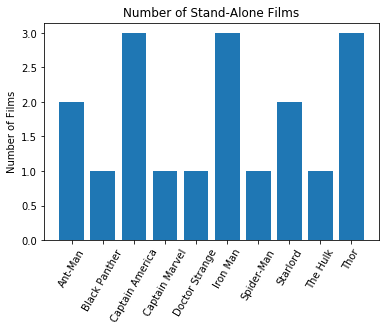

In [251]:
char = ['Ant-Man', 'Black Panther', 'Captain America', 'Captain Marvel', 'Doctor Strange',
        'Iron Man', 'Spider-Man', 'Starlord', 'The Hulk', 'Thor']

x_axis = np.arange(len(char))
plt.xticks(rotation=60)
plt.bar(x_axis, character_counts, tick_label=char, align="center")
plt.ylabel("Number of Films")
plt.title("Number of Stand-Alone Films")

plt.show()

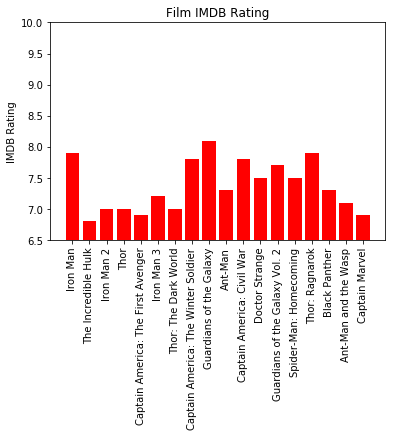

In [252]:
x_axis2 = np.arange(len(imdb_stndAlone_df["Film"]))
plt.xticks(rotation=90)
plt.bar(x_axis2, imdb_stndAlone_df["IMDB Rating (out of 10)"], tick_label=imdb_stndAlone_df["Film"], align="center", color="red")
plt.ylim(6.5, 10)
plt.ylabel("IMDB Rating")
plt.title("Film IMDB Rating")

plt.show()

In [170]:
imdb_stndAlone_df["Film Budget"].sum()

3104000000.0

In [171]:
imdb_stndAlone_df["BoxOffice (domestic)"].sum()

5105822211.0

In [359]:
total_profit = imdb_stndAlone_df["BoxOffice (domestic)"].sum() - imdb_stndAlone_df["Film Budget"].sum()
total_profit

2001822211.0

In [253]:
imdb_stndAlone_df.groupby("Main Character").sum()

,Film Budget,BoxOffice (domestic),IMDB Rating (out of 10),Profits (Domestic)
Main Character,,,,
Ant-Man,292000000.0,3.546510e+08,14.4,62650963.0
Black Panther,200000000.0,5.011050e+08,7.3,301105037.0
Captain America,560000000.0,8.133535e+08,22.5,253353453.0
Captain Marvel,152000000.0,3.333058e+08,6.9,181305815.0
Doctor Strange,165000000.0,2.326307e+08,7.5,67630718.0
Iron Man,540000000.0,1.039348e+09,22.1,499347885.0
Spider-Man,175000000.0,3.341668e+08,7.5,159166825.0
Starlord,370000000.0,6.603967e+08,15.8,290396721.0
The Hulk,150000000.0,1.345184e+08,6.8,-15481610.0


In [32]:
characters = []
for i in imdb_csv["Main Character"]:
    if i not in characters:
        characters.append(i)
    else:
        continue
    
print(characters)

['Iron Man', 'The Hulk', 'Thor', 'Captain America', 'Captain America, Iron Man, Thor, The Hulk', 'Starlord, Gamora, Drax, Groot, Rocket', 'Ant-Man', 'Captain America, Iron man, Ant-Man, Black Panther, Spider-Man', 'Doctor Strange', 'Spider-Man, Iron Man', 'Thor, The Hulk', 'Black Panther', 'Captain America, Iron Man, Thor, The Hulk, Doctor Strange, Spider-Man, Starlord, Gamora, Drax, Groot, Rocket', 'Captain Marvel']


In [33]:
characters = ['Iron Man', 'The Hulk', 'Thor', 'Captain America', 'Starlord', 
              'Gamora', 'Drax', 'Groot', 'Rocket', 'Ant-Man', 'Black Panther', 
              'Spider-Man', 'Doctor Strange', 'Captain Marvel']

In [34]:
imdb_csv["Film Profits"].sum()

13966285055

In [35]:
imdb_csv["Film Profits"].max()

1727709917

In [36]:
movies = [movies for movies in imdb_csv["Film"]]

movies 

['Iron Man',
 'The Incredible Hulk',
 'Iron Man 2',
 'Thor',
 'Captain America: The First Avenger',
 "Marvel's The Avengers",
 'Iron Man 3',
 'Thor: The Dark World',
 'Captain America: The Winter Soldier',
 'Guardians of the Galaxy',
 'Avengers: Age of Ultron',
 'Ant-Man',
 'Captain America: Civil War',
 'Doctor Strange',
 'Guardians of the Galaxy Vol. 2',
 'Spider-Man: Homecoming',
 'Thor: Ragnarok',
 'Black Panther',
 'Avengers: Infinity War',
 'Ant-Man and the Wasp',
 'Captain Marvel']

In [69]:
omdb_url = "http://www.omdbapi.com/?apikey=trilogy&t="

movies = ['Iron Man',
 'The Incredible Hulk',
 'Iron Man 2',
 'Thor',
 'Captain America: The First Avenger',
 'The Avengers',
 'Iron Man 3',
 'Thor: The Dark World',
 'Captain America: The Winter Soldier',
 'Guardians of the Galaxy',
 'Avengers: Age of Ultron',
 'Ant-Man',
 'Captain America: Civil War',
 'Doctor Strange',
 'Guardians of the Galaxy Vol. 2',
 'Spider-Man: Homecoming',
 'Thor: Ragnarok',
 'Black Panther',
 'Avengers: Infinity War',
 'Ant-Man and the Wasp',
 'Captain Marvel']

for movie in movies:
    response = requests.get(omdb_url + movie).json()
    print(json.dumps(response, indent=4, sort_keys=True))

{
    "Actors": "Robert Downey Jr., Terrence Howard, Jeff Bridges, Gwyneth Paltrow",
    "Awards": "Nominated for 2 Oscars. Another 20 wins & 65 nominations.",
    "BoxOffice": "$318,298,180",
    "Country": "USA",
    "DVD": "30 Sep 2008",
    "Director": "Jon Favreau",
    "Genre": "Action, Adventure, Sci-Fi",
    "Language": "English, Persian, Urdu, Arabic, Hungarian",
    "Metascore": "79",
    "Plot": "After being held captive in an Afghan cave, billionaire engineer Tony Stark creates a unique weaponized suit of armor to fight evil.",
    "Poster": "https://m.media-amazon.com/images/M/MV5BMTczNTI2ODUwOF5BMl5BanBnXkFtZTcwMTU0NTIzMw@@._V1_SX300.jpg",
    "Production": "Paramount Pictures",
    "Rated": "PG-13",
    "Ratings": [
        {
            "Source": "Internet Movie Database",
            "Value": "7.9/10"
        },
        {
            "Source": "Rotten Tomatoes",
            "Value": "93%"
        },
        {
            "Source": "Metacritic",
            "Value": "79

{
    "Actors": "Robert Downey Jr., Gwyneth Paltrow, Don Cheadle, Guy Pearce",
    "Awards": "Nominated for 1 Oscar. Another 17 wins & 61 nominations.",
    "BoxOffice": "$408,992,272",
    "Country": "China, USA",
    "DVD": "24 Sep 2013",
    "Director": "Shane Black",
    "Genre": "Action, Adventure, Sci-Fi",
    "Language": "English",
    "Metascore": "62",
    "Plot": "When Tony Stark's world is torn apart by a formidable terrorist called the Mandarin, he starts an odyssey of rebuilding and retribution.",
    "Poster": "https://m.media-amazon.com/images/M/MV5BMjE5MzcyNjk1M15BMl5BanBnXkFtZTcwMjQ4MjcxOQ@@._V1_SX300.jpg",
    "Production": "Walt Disney Pictures",
    "Rated": "PG-13",
    "Ratings": [
        {
            "Source": "Internet Movie Database",
            "Value": "7.2/10"
        },
        {
            "Source": "Rotten Tomatoes",
            "Value": "80%"
        },
        {
            "Source": "Metacritic",
            "Value": "62/100"
        }
    ],
    "

{
    "Actors": "Chris Pratt, Zoe Saldana, Dave Bautista, Vin Diesel",
    "Awards": "Nominated for 1 Oscar. Another 12 wins & 42 nominations.",
    "BoxOffice": "$389,804,217",
    "Country": "USA",
    "DVD": "22 Aug 2017",
    "Director": "James Gunn",
    "Genre": "Action, Adventure, Comedy, Sci-Fi",
    "Language": "English",
    "Metascore": "67",
    "Plot": "The Guardians struggle to keep together as a team while dealing with their personal family issues, notably Star-Lord's encounter with his father the ambitious celestial being Ego.",
    "Poster": "https://m.media-amazon.com/images/M/MV5BMTg2MzI1MTg3OF5BMl5BanBnXkFtZTgwNTU3NDA2MTI@._V1_SX300.jpg",
    "Production": "Walt Disney Pictures",
    "Rated": "PG-13",
    "Ratings": [
        {
            "Source": "Internet Movie Database",
            "Value": "7.7/10"
        },
        {
            "Source": "Rotten Tomatoes",
            "Value": "83%"
        },
        {
            "Source": "Metacritic",
            "Valu

In [109]:
box_office = []

imdb_rating = []

year_released = []

for movie in movies:
    cur_film = requests.get(omdb_url + movie).json()
    box_results = cur_film["BoxOffice"]
    box_office.append(box_results)
    
    imdb_results = cur_film["imdbRating"]
    imdb_rating.append(imdb_results)
    
    year_results = cur_film["Year"]
    year_released.append(year_results)
    
print(year_released)

['2008', '2008', '2010', '2011', '2011', '2012', '2013', '2013', '2014', '2014', '2015', '2015', '2016', '2016', '2017', '2017', '2017', '2018', '2018', '2018', '2019']


In [110]:
for movie in range(len(movies)):
    
    #print(f"making request number {movie} for {movies[movie]} ")
    
    response = requests.get(url + movies[movie]).json()
    
    #response_json.append(response.json())
    
    print(f"Box Office for {colored(response['Title'], 'green')} is {colored(response['BoxOffice'], 'red')} domestically")

Box Office for Iron Man is $318,298,180 domestically
Box Office for The Incredible Hulk is $134,518,390 domestically
Box Office for Iron Man 2 is $312,057,433 domestically
Box Office for Thor is $181,015,141 domestically
Box Office for Captain America: The First Avenger is $176,636,816 domestically
Box Office for The Avengers is $623,279,547 domestically
Box Office for Iron Man 3 is $408,992,272 domestically
Box Office for Thor: The Dark World is $206,360,018 domestically
Box Office for Captain America: The Winter Soldier is $228,636,083 domestically
Box Office for Guardians of the Galaxy is $270,592,504 domestically
Box Office for Avengers: Age of Ultron is $429,113,729 domestically
Box Office for Ant-Man is $138,002,223 domestically
Box Office for Captain America: Civil War is $408,080,554 domestically
Box Office for Doctor Strange is $232,630,718 domestically
Box Office for Guardians of the Galaxy Vol. 2 is $389,804,217 domestically
Box Office for Spider-Man: Homecoming is $334,166,

In [111]:
marvel_df = pd.DataFrame({
    "Film": movies,
    "Main Character": ['Iron Man', 'The Hulk', 'Iron Man', 'Thor', 'Captain America',
                  'Captain America', "Iron Man", 'Thor', 'Captain America', 'Starlord',
                  'Iron Man', 'Ant-Man', 'Captain America', 'Doctor Strange',
                  'Starlord', 'Spider-Man', 'Thor', 'Black Panther', 'Captain America',
                  'Ant-Man', 'Captain Marvel'],
    "BoxOffice (domestic)": box_office,
    "IMDB Rating (out of 10)": imdb_rating,
    "Year Released": year_released,
})

#marvel_df = marvel_df.drop

marvel_df

,Film,Main Character,BoxOffice (domestic),IMDB Rating (out of 10),Year Released
0,Iron Man,Iron Man,"$318,298,180",7.9,2008
1,The Incredible Hulk,The Hulk,"$134,518,390",6.8,2008
2,Iron Man 2,Iron Man,"$312,057,433",7.0,2010
3,Thor,Thor,"$181,015,141",7.0,2011
4,Captain America: The First Avenger,Captain America,"$176,636,816",6.9,2011
5,The Avengers,Captain America,"$623,279,547",8.1,2012
6,Iron Man 3,Iron Man,"$408,992,272",7.2,2013
7,Thor: The Dark World,Thor,"$206,360,018",7.0,2013
8,Captain America: The Winter Soldier,Captain America,"$228,636,083",7.8,2014
9,Guardians of the Galaxy,Starlord,"$270,592,504",8.1,2014


In [105]:
#marvel_base_url = "http://gateway.marvel.com/v1/public/comics?&apikey="

beginDateStr = "1990"

endDateStr = "2014"

marvel_base_url = "http://gateway.marvel.com/v1/public/comics?limit=100&format=comic&formatType=comic&dateRange="+beginDateStr+"%2C"+endDateStr+"&apikey="

message = "code"

api_key = "301d8fc86a5c3357bfd87b00cf3c0540db3de0df"

#requests.get(marvel_base_url + message + api_key).json()
requests.get(marvel_base_url + api_key).json()

{'code': 'InvalidCredentials', 'message': 'The passed API key is invalid.'}

In [51]:
imdb_base_url = "http://www.imdb.com/"

requests.get(imdb_base_url + "Thor").json()

JSONDecodeError: Expecting value: line 2 column 1 (char 1)

In [107]:
marvel_df.groupby("Main Character")["Film"].count()

Main Character
Ant-Man            2
Black Panther      1
Captain America    5
Captain Marvel     1
Doctor Strange     1
Iron Man           4
Spider-Man         1
Starlord           2
The Hulk           1
Thor               3
Name: Film, dtype: int64

In [112]:
marvel_df.groupby("Main Character")["BoxOffice (domestic)"].sum()

Main Character
Ant-Man                                              $138,002,223N/A
Black Panther                                           $501,105,037
Captain America    $176,636,816$623,279,547$228,636,083$408,080,5...
Captain Marvel                                                   N/A
Doctor Strange                                          $232,630,718
Iron Man            $318,298,180$312,057,433$408,992,272$429,113,729
Spider-Man                                              $334,166,825
Starlord                                    $270,592,504$389,804,217
The Hulk                                                $134,518,390
Thor                            $181,015,141$206,360,018$314,971,245
Name: BoxOffice (domestic), dtype: object

In [113]:
marvel_df.to_csv("marvel_df.csv")

In [175]:
# This is the original DataFrame with multiple "Main Character" values


original_df = pd.read_csv("Resources/marvel_films.csv")
original_df

,Film,Main Character,Film Budget,Worldwide Gross,Film Profits,IMDB Rating (out of 10),Year Released
0,Iron Man,Iron Man,140000000,585174222,445174222,7.9,2008
1,The Incredible Hulk,The Hulk,150000000,263427551,113427551,6.8,2008
2,Iron Man 2,Iron Man,200000000,623933331,423933331,7.0,2010
3,Thor,Thor,150000000,449326618,299326618,7.0,2011
4,Captain America: The First Avenger,Captain America,140000000,370569774,230569774,6.9,2011
5,Marvel's The Avengers,"Captain America, Iron Man, Thor, The Hulk",220000000,1519557910,1299557910,8.1,2012
6,Iron Man 3,Iron Man,200000000,1215439994,1015439994,7.2,2013
7,Thor: The Dark World,Thor,170000000,644783140,474783140,7.0,2013
8,Captain America: The Winter Soldier,Captain America,170000000,714766572,544766572,7.8,2014
9,Guardians of the Galaxy,"Starlord, Gamora, Drax, Groot, Rocket",170000000,774176600,604176600,8.1,2014


In [177]:
original_df.groupby("Main Character")["Film"].count()

Main Character
Ant-Man                                                                                                         2
Black Panther                                                                                                   1
Captain America                                                                                                 2
Captain America, Iron Man, Thor, The Hulk                                                                       2
Captain America, Iron Man, Thor, The Hulk, Doctor Strange, Spider-Man, Starlord, Gamora, Drax, Groot, Rocket    1
Captain America, Iron man, Ant-Man, Black Panther, Spider-Man                                                   1
Captain Marvel                                                                                                  1
Doctor Strange                                                                                                  1
Iron Man                                                                 

In [338]:
imdb_stndAlone_df["Film"] == Narys_marvel_df["Film"]

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
Name: Film, dtype: bool

In [339]:
Narys_marvel_df


,Film,Film ID,Budget,Box Office Sales (Global),Rating,Profits (Global)
0,Iron Man,1726,140000000,585174222,7.5,445174222
1,The Incredible Hulk,1724,150000000,163712074,6.2,13712074
2,Iron Man 2,10138,200000000,623933331,6.8,423933331
3,Thor,10195,150000000,449326618,6.7,299326618
4,Captain America The First Avenger,1771,140000000,370569774,6.8,230569774
5,Iron Man 3,68721,200000000,1215439994,6.9,1015439994
6,Thor The Dark World,76338,170000000,644571402,6.7,474571402
7,Captain America The Winter Soldier,100402,170000000,714766572,7.7,544766572
8,Guardians of the Galaxy,118340,170000000,773328629,7.9,603328629
9,Ant Man,102899,130000000,519311965,7.1,389311965
